# Finding the Right Path

In [ ]:
#@title Basic Libraries +
# First the usual imports:
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

# And one special addition
# Add some 3D tools
from mpl_toolkits.mplot3d import Axes3D

# define some useful tools
# we are going to want to draw vectors on our graphs. While this method may
# not make sense right now, it will as we move through this sheet.
def drawVector(v, c, origin=None):
  """
  v is the 2D vector
  c is the color
  origin, if not provided, is assumed to be zero
  """
  if origin is None:
    origin = [0,0]
  
  plt.arrow(origin[0], origin[1], v[0], v[1],
          head_width = 0.5, length_includes_head=True,
          width=0.05, color=c, alpha=0.6)

Now that we are comfortable (almost) with our compact notation for vector description we can now apply this to a familiar area of modelling trajectories.  We can now use a kinematic function to replace the coefficients in front of the components.  The path an object takes as it moves through a 3D world is called a **trajectory** in mathematics it is called a *space curve* whose more general description is a *parametric function*.

## Angle Projectile Motion

To get a feel for how this looks lets look at a familiar model: a launched projectile...

$$\vec{p}(t) = (v_x\;t)\hat{i} + (v_y\;t-\frac{1}{2} g\;t^2)\hat{j}$$

where we take $\hat{i}$ to be horizontal and $\hat{j}$ to be vertical.

First, you should already be familiar with the individual kinematic expressions.  The only real difference is the way in which we catalog the two components of the path.  The individual expressions which represent a model of the behavior along each axis *are* called parametric expressions because both are driven (their domain) by a common variable$^\dagger$. This technique is more than fancy notation. This representation also allows us to do mathematical analysis in a compact and easy way.

Lets look at how we plot this trajectory.
Suppose we launch a potato from a potato cannon (where do we have one of those?) at $25. m/s$ at an angle of $60^\circ$ above the horizontal.


$^\dagger \small \text{Yes, parametric equations can depend on 2 or more common variables to form parametric surfaces and parametric volumes, etc.}$

In [ ]:
#@title Setting up trajectory models
launchSpeed = 25.
launchAngle = 60.
gravFieldStrength = 10.

v_x = launchSpeed * np.cos( np.radians(launchAngle) )
v_y = launchSpeed * np.sin( np.radians(launchAngle) )

"""
  There are many ways to generate the data set for a parametric graph.  When we 
  generated data for 2D data we created separate columns of arrays for the 
  horizontal and vertical axis (e.g. time and position).  Now we have time, the
  paramentric value, and two (for 2D) or 3 (for 3D) values for each value of
  time. I am choosing to keep the position coordinates in their own variable,
  pos (you can use your own symbol) and time in a separate symbol.  Someone else
  might choose to combine all the coordinates.
"""

def p(t):
  # ith coordinate kinematic
  x = v_x * t
  # jth coordinate kinematic
  y = v_y * t - 1/2 * gravFieldStrength * t**2

  return np.array([x, y])

t_flight = 2 * v_y / gravFieldStrength  # from last year for a flight on level ground

# pulling it together:
"""
  Generate 50 time values (the default) between launch and splashdown
"""
time = np.linspace(0.0, t_flight)

"""
  construct our position array.  This will look line a list of 2D points whose 
  'origin' is our starting point (assumed) and the point in space the potato is
  at each time.
  e.g.    pos = [[0.        , 0.        ],
                 [1.10, 1.87],
                 [2.21, 3.67],
                 [3.31, 5.39],
                 [4.42, 7.03],...
  np.array is our familiar command, I enclose the parametric equations in a 
  pair of square brackets.  The whole expression ends with a '.T' because I want
  to 'flip' the array (technical term: transpose) so each time coordinate look
  like the way we like to visualize vectors as sets of values like [ax, ay, az]
"""
pos = np.array(p(time)).T  # pos is now a 2 dimensional array where column 1, index 0 is the x

pos[:5]  # display the first five values so we can see the structure.

array([[0.        , 0.        ],
       [1.10462424, 1.87421908],
       [2.20924848, 3.67034569],
       [3.31387272, 5.38837984],
       [4.41849696, 7.02832153]])

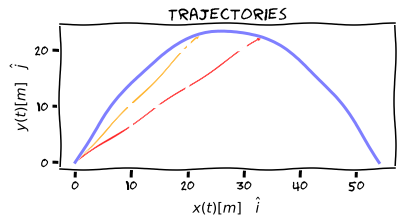

In [ ]:
#@title Plotting trajectory models

# begin the plot process...
plt.xkcd()

# plot the the x and y coordinates (index 0 and 1, respecively)
plt.plot(pos.T[0], pos.T[1], c="b", label="x plot", linewidth=3, alpha=0.5)
"""
  One trick we want to add. In general when plotting trajectories want the axis 
  to have the same apparent scale (called aspect ratio).  Ideally we want the 
  ruler measurement of a 1m line to look the same whether it is drawn on the 
  x vs y axis. 
  To do this we have to do the following:
"""
axs = plt.gca()
axs.set_aspect(1.0)


# label the axes and graph
plt.xlabel("$x(t) [m]\quad \hat{i}$")
plt.ylabel("$y(t)[m]\quad \hat{j}$")
plt.title("Trajectories")

# put up a legend
#plt.legend(loc="upper left")  # has to appear after we plot.
plt.grid(True)

# Lets draw a vector on the graph from the starting point to a moment in time
drawVector(pos[20], "orange")
drawVector(pos[30], "red")

# show it.
plt.show()

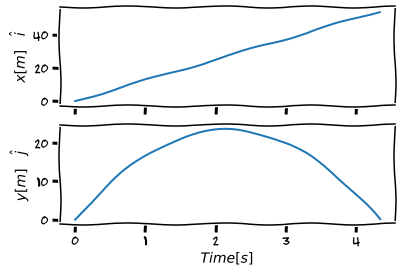

In [ ]:
#@title Plot each coordinate on a separate time graph
# Declare your style first.
#plt.style.use("classic")
plt.xkcd()

# 2 vertical graphs x 1 horizontally, share the x axis (time)
fig, (x_axis, y_axis) = plt.subplots(2, 1, sharex=True)
# fig refers to the whole drawing space while the individual 
# 'axes' refer to each of the 3, in this case, graphs.

# perform your plots but instead of the global plt use the axes listed above.
x_axis.plot(time, pos.T[0])
x_axis.set_ylabel("$x[m]\quad \hat{i}$")
x_axis.grid(True)

y_axis.plot(time, pos.T[1])
y_axis.set_ylabel("$y[m]\quad \hat{j}$")
y_axis.grid(True)

# global x axis label
plt.xlabel("$Time[s]$")

fig.show()

Here is where the power of our notation serves to simplify our calculations for velocity and acceleration.  Where our position is given by:

$$\vec{p}(t) = (v_x\;t)\hat{i} + (v_y\;t-\frac{1}{2} g\;t^2)\hat{j} \tag{1.1}$$

we can determine the velocity as a function of time easily:

$$\vec{v}(t) = (v_x)\hat{i} + (v_y-g\;t)\hat{j}$$

All the symbols other than those that have a expression using t are treated as constants.  So we can just as easily get the acceleration:

$$\vec{a}(t) = - g\;\hat{j}$$

What we can see is that, as we remember from last year, the acceleration is independant of time and is always downward with a magnitude of $g$.

Another thing we can do now that we understand how to use dot products we can ask where the velocity might be perpendicular to the acceleration (a location where, even for a brief moment, the velocity is changing the least. This is simply the moment where $\vec{v}\cdot \vec{a} = 0$

$$
\begin{align*}
  0 &= \vec{v} \cdot \vec{a} \\
    &= (v_y - g\;t) (-g) \\
    \implies t &= \frac{v_y}{g} \\ 
    &\text{ ...or the top of the arc}
  \end{align*}
$$

OK, so we could have guessed all of this without the mathematical tomfoolery but that is the essense of how to learn about a new tool.  We examine something whose outcome we know already by other means. We gain confidence in the result and then apply it to a new situation.



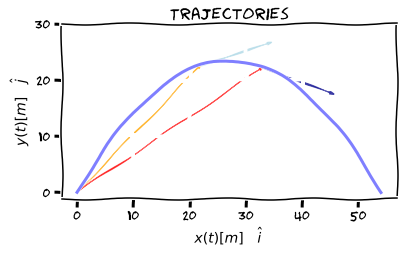

In [ ]:
#@title Plotting Vectors on the trajectory
"""
This code area assumes
time was defined above
pos holds the position values
drawVector function was defined above 
      (simply wraps a method for drawing arrows)
"""

# define the velocity
# ith coordinate kinematic
def v(t):
  # so when you want to generate a list of values which are constant then
  # multiply the constant by an array of 1s (e.g. [1,1,1,1,1...])
  vx = v_x * np.ones_like(time)
  # jth coordinate kinematic
  vy = v_y - gravFieldStrength * t
  return np.array([vx, vy])

vel = np.array(v(time)).T  # vel is now a 2 dimensional array where column 1, index 0 is the x

# begin the plot process...
plt.xkcd()

# plot the trajectory
plt.plot(pos.T[0], pos.T[1], c="b", label="x plot", linewidth=3, alpha=0.5)
axs = plt.gca()
axs.set_aspect(1.0)
axs.set_ylim(top=30.0) # after viewing the graph for the first time I want to add a little more room at the top

# label the axes and graph
plt.xlabel("$x(t) [m]\quad \hat{i}$")
plt.ylabel("$y(t)[m]\quad \hat{j}$")
plt.title("Trajectories")
plt.grid(True)

# Lets draw a vector on the graph from the starting point to a moment in time
drawVector(pos[20], "orange")  # draw the position vector
drawVector(vel[20], "lightblue", pos[20]) # draw the velocity at the tip of the position vector

drawVector(pos[30], "red") # draw the position vector
drawVector(vel[30], "darkblue", pos[30]) # draw the velocity at the tip of the position vector

# show it.
plt.show()

## Uniform Circular Motion

Let's look at a different system we visited last year, uniform circular motion.

$$\vec{p}(t) = R\; \cos( \omega\;t )\hat{i} + R\; \sin( \omega\;t )\hat{j}$$

Notice that we could have swapped the terms for the function in front of the basis vectors $\hat{i}$ and $\hat{j}$. The choice is only defined by where you want your trajectory to start.

As above, lets look at how we plot this trajectory. $\omega$ is the uniform angular speed in $rad/s$ and $R$ is the radius of the trajectory in $m$. So we will look at the trajectory of a wooden horse on a merry-go-round in an amusement park where $R$ is $4.0m$ and is spinning at a rate of $2.0 rev/min$


In [ ]:
#@title Setting up trajectory models
omega = 2.0 * 2 * np.pi / 60 # rad/sec
radius = 4.0 # m

"""
  There are many ways to generate the data set for a parametric graph.  When we 
  generated data for 2D data we created separate columns of arrays for the 
  horizontal and vertical axis (e.g. time and position).  Now we have time, the
  paramentric value, and two (for 2D) or 3 (for 3D) values for each value of
  time. I am choosing to keep the position coordinates in their own variable,
  pos (you can use your own symbol) and time in a separate symbol.  Someone else
  might choose to combine all the coordinates.
"""

def p(t):
  # ith coordinate kinematic
  x = radius * np.cos(omega * t)
  # jth coordinate kinematic
  y = radius * np.sin(omega * t)
  # return the pair values representing the position vector
  return np.array([x, y])

"""
  Set up our trajectory graph...
"""
t_revolution = 2 * np.pi / omega  # time for a single revolution

# pulling it together:
"""
  Generate 50 time values (the default) between launch and splashdown
"""
time = np.linspace(0.0, t_revolution)

"""
  construct our position array.  This will look line a list of 2D points whose 
  'origin' is our starting point (assumed) and the point in space the potato is
  at each time.
  e.g.    pos = [[0.        , 0.        ],
                 [1.10, 1.87],
                 [2.21, 3.67],
                 [3.31, 5.39],
                 [4.42, 7.03],...
  np.array is our familiar command, I enclose the parametric equations in a 
  pair of square brackets.  The whole expression ends with a '.T' because I want
  to 'flip' the array (technical term: transpose) so each time coordinate look
  like the way we like to visualize vectors as sets of values like [ax, ay, az]
"""
pos = p(time)  # pos is now a 2 dimensional array where column 1, index 0 is the x

pos.T[:5]  # display the first five values so we can see the structure.

array([[4.  , 0.  ],
       [3.97, 0.51],
       [3.87, 1.01],
       [3.71, 1.5 ],
       [3.49, 1.96]])

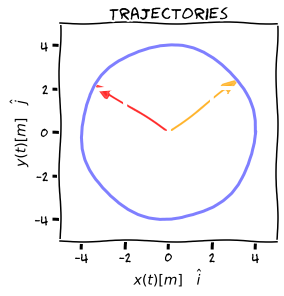

In [ ]:
#@title Plotting trajectory models

# begin the plot process...
plt.xkcd()

# plot the the x and y coordinates (index 0 and 1, respecively)
plt.plot(pos[0], pos[1], c="b", label="x plot", linewidth=3, alpha=0.5)
# One trick we want to add. In general we want the axis to have the same
# apparent scale (called aspect ratio).  Ideally we want the ruler measurement
# of a 1m line to look the same whether it is drawn on the x vs y axis.
# do do this we have to do the following:
axs = plt.gca()
axs.set_aspect(1.0)
# make it a skosh bigger
axs.set_ylim(-5.,5.)
axs.set_xlim(-5.,5.)

# label the axes and graph
plt.xlabel("$x(t) [m]\quad \hat{i}$")
plt.ylabel("$y(t)[m]\quad \hat{j}$")
plt.title("Trajectories")

# put up a legend
plt.grid(True)

# Lets draw a vector on the graph from the starting point to a moment in time
drawVector(p(time[5]), "orange")
drawVector(p(time[20]), "red")

# show it.
plt.show()

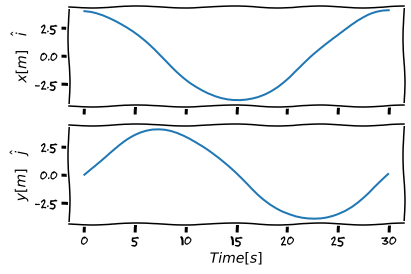

In [ ]:
#@title Plot each coordinate on a separate time graph
# Declare your style first.
#plt.style.use("classic")
plt.xkcd()

# 2 vertical graphs x 1 horizontally, share the x axis (time)
fig, (x_axis, y_axis) = plt.subplots(2, 1, sharex=True)
# fig refers to the whole drawing space while the individual 
# 'axes' refer to each of the 3, in this case, graphs.

# perform your plots but instead of the global plt use the axes listed above.
x_axis.plot(time, pos[0])
x_axis.set_ylabel("$x[m]\quad \hat{i}$")
x_axis.grid(True)

y_axis.plot(time, pos[1])
y_axis.set_ylabel("$y[m]\quad \hat{j}$")
y_axis.grid(True)

# global x axis label
plt.xlabel("$Time[s]$")

fig.show()

We can do much of the same analysis we saw with the balistic trajectory and we can see the real power of the kind of analysis we saw before.  We can look at the velocity  and acceleration:

$$\vec{v}(t) = - \omega\;R\; \sin( \omega\;t )\hat{i} + \omega\;R\; \cos( \omega\;t )\hat{j}$$

$$\vec{a}(t) = - \omega^2\;R\; \cos( \omega\;t )\hat{i} - \omega^2\;R\; \sin( \omega\;t )\hat{j}$$

What is the relative direction of the $\vec{v}$ and $\vec{p}$? 

ans: What does $\vec{p}\cdot\vec{v}$ look like?
$$
\begin{align}
\vec{p}\cdot\vec{v} &= \left(R\; \cos( \omega\;t )\right) \left(- \omega\;R\; \sin( \omega\;t )\right) + \left(R\; \sin( \omega\;t )\right) \left(\omega\;R\; \cos( \omega\;t )\right) & \\
&=-\omega\;R^2 \cos( \omega\;t )\sin( \omega\;t ) + \omega\;R^2 \cos( \omega\;t )\sin( \omega\;t )\\
&= 0
\end{align}
$$

Or simply said $\vec{v}$ is always perpendicular to $\vec{p}$.  It isn't hard to see that the same is true for $\vec{v}$ and $\vec{a}$.

The relationship between $\vec{p}$ and $\vec{a}$ is equally interesting:
$$
\begin{align}
\vec{p}\cdot\vec{a} &= \left(R\; \cos( \omega\;t )\right) \left(- \omega^2\;R\; \cos( \omega\;t )\right) + \left(R\; \sin( \omega\;t )\right) \left(-\omega^2\;R\; \sin( \omega\;t )\right) & \\
&=-\omega\;R^2 \cos^2( \omega\;t ) + \omega\;R^2 \sin^2( \omega\;t )\\
&= -\omega\;R^2
\end{align}
$$
since $\omega$ and $R$ are both positive and constant, the orientation of $\vec{p}$ and $\vec{a}$ are anti-parallel (parallel but pointed in opposite directions.)

Finally we can ask what the relationship between the various vector magnitudes are:

$$
\begin{alignat}{3}
\left|\vec{v}\right|^2 &= \vec{v}\cdot \vec{v}& &= \; \omega^2 \; R^2& & \\
\left|\vec{a}\right|^2 &= \vec{a}\cdot \vec{a}& &= \; \omega^4 \; R^2& & \\
\implies \left|\vec{a}\right| &= \omega^2\quad & \left|\vec{a}\right| &= \frac{\left|\vec{v}\right|^2}{R} 
\end{alignat}
$$

Lets look at the numerical simulation...

At time  3.06 s
     the particle's position is [3.21 2.39] m
                the velocity is [-0.5   0.67] m/s
            the acceleration is [-0.14 -0.1 ] m/s²


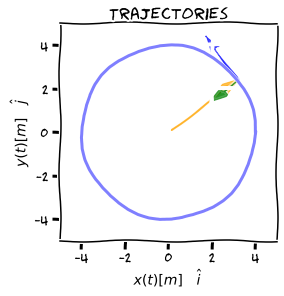

In [ ]:
#@title Plot the trajectory with some vectors
# after seeing how things are done above we can write the velocity and acceleration graphs
def v(t):
  # ith coordinate kinematic
  x = - radius * omega * np.sin(omega * t)
  # jth coordinate kinematic
  y = radius * omega * np.cos(omega * t)
  # return the pair values representing the position vector
  return np.array([x, y])

def a(t):
  # ith coordinate kinematic
  x = - radius * omega**2 * np.cos(omega * t)
  # jth coordinate kinematic
  y = - radius * omega**2 * np.sin(omega * t)
  # return the pair values representing the position vector
  return np.array([x, y])

"""
Repeat our trajectory but lets put a vector in there as well
"""
# begin the plot process...
plt.xkcd()

# plot the the x and y coordinates (index 0 and 1, respecively)
plt.plot(pos[0], pos[1], c="b", label="x plot", linewidth=3, alpha=0.5)
# One trick we want to add. In general we want the axis to have the same
# apparent scale (called aspect ratio).  Ideally we want the ruler measurement
# of a 1m line to look the same whether it is drawn on the x vs y axis.
# do do this we have to do the following:
axs = plt.gca()
axs.set_aspect(1.0)
# make it a skosh bigger
axs.set_ylim(-5.,5.)
axs.set_xlim(-5.,5.)

# label the axes and graph
plt.xlabel("$x(t) [m]\quad \hat{i}$")
plt.ylabel("$y(t)[m]\quad \hat{j}$")
plt.title("Trajectories")

# put up a legend
plt.grid(True)


# Lets draw a vector on the graph from the starting point to a moment in time
# pick a time index
idx = 5  # change this value to see different locations
np.set_printoptions(precision=2)  # trick to limit the output
print(f"At time {time[idx]:5.2f} s" "\n"
      f"     the particle's position is {p(time[idx])} m" "\n"
      f"                the velocity is {v(time[idx])} m/s" "\n"
      f"            the acceleration is {a(time[idx])} m/s²")

drawVector(p(time[idx]), "orange")
scl = 3.0  # scale factor so we can see the vectors (see following discussion)
drawVector(scl*v(time[idx]), "blue", p(time[idx]))
# first argument v looks like [vv_x, v_y]
drawVector(scl*scl*a(time[idx]), "green", p(time[idx]))

# show it.
plt.show()


Yellow is $\vec{p}$, blue is $\vec{v}$, and green is $\vec{a}$.  The reason we want to and can multiply the velocity and acceleration vectors by an arbitrary constant is because the units on the graph are in meters while velocity and acceleration are in $m/s$ and $m/s^2$ respecitvely.  We can provde any scaling factor we want to allow us to 
 1. see the vectors and...
 2. convert from their respective units into m.

What we want to see, after all, is the direction of the vectors not their lengths.  You can re-run the graph with different time points.

## Fun with reference frames

Parametric represnetations also allow us to model motion from different perspectives.  Suppose we throw a ball straight up and down on a train rolling through a station.  What does it look like from someone on the platform?

On the train the motion might look like this:
$$\vec{p_{ball}}(t) = \left(v_b\;t-\frac{1}{2}g\;t^2\right)\;\hat{j}$$

from the bystander on the patform the train itself is rolling through with a speed $v_{tr}$ to the right (for example).

$$\vec{p_{pov}}(t) = \left( v_{tr} t \right) \hat{i}$$

The trajectory of the ball from the point of view of the bystander is simply the sum of these two perspectives:

$$\vec{p_{ball}}'(t) = \vec{p_{ball}}(t) + \vec{p_{pov}}(t)$$

I think you can see that this is just the ballistic trajectory we saw in the first section.  OK, now for something more interesting.

In the frames of reference movie we saw a spinning wheel being towed sideways on a toy railroad car.  How might we model the trajectory they showed of the trace of the pen as the wheel was towed to the right.

First we model the motion of the wheel:
$$\vec{p_w}(t) = R\; \cos( \omega\;t )\hat{i} + R\; \sin( \omega\;t )\hat{j}$$

Then we model the motion of the toy railroad car:
$$\vec{p_c}(t) = \left( v_c t \right) \hat{i}$$

Now we combine them.  

$$\vec{p}(t) = \vec{p_c}(t) + \vec{p_c}(t)$$
and we can find the usual kinematics...

Now to model.  I'll start things out but you finish it.

In [ ]:
#@title Modelling moion in another refernce frame
wheel_radius = 0.5 # m
wheel_angSpeed = 1 * 2 * np.pi # ~3 rad/sec
car_speed = 0.5 # m/s

def p_wheel(t):
  px = wheel_radius * np.sin(wheel_angSpeed * t)
  py = wheel_radius * np.cos(wheel_angSpeed * t)
  return np.array([px, py])

def p_car(t):
  px = car_speed * t
  py = 0 * np.ones_like(t)  # you could put the cart on a slope?
  return np.array([px, py])

"""
  Copy the graphing elements from the above cells and plot the trajectory. Once
  you get it working try tweaking some of the parameters, make the train go 
  faster or slower. What happens if the wheel goes faster or slower?

  How much time do you run this for? 1 rotation or 5?  
"""

time = np.linspace(0.0, 2.0, 200)

def p(t):
  return p_wheel(time) + p_car(time)

pos = p(time)

plt.plot(pos[0], pos[1], c="b", label="trajectory", linewidth=3, alpha=0.5)
axs = plt.gca()
axs.set_aspect(1.0)
plt.show()
"""
  Try putting a velocity vector on a point in the trajectory.  You may have 
  to calculate the velocity and the acceleration.  If you sample your trajectory 
  you may get away with using numerical derivatives.
"""

"""
  What happens if the frame of reference were another rotating platform?  In
  otherwords what would be the trajectory of a bug on a turntable which is 
  riding on another, larger turntable?
"""